<a href="https://colab.research.google.com/github/sumedhekaru/Analysing-Student-Reviews/blob/master/Analysing_student_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Every semester, the students have the opportunity to review me using the feedback tools provided by my university, so I am a professor. I usually read every one of those to improve my teaching skills. 

Now imagine a review system that produces 100s of reviews if not 1000s of reviews on a product or service. Reading every review might be almost impossible. That's where we need machine learning techniques. Analyzing reviews are very useful to get the customer's voice and improve the product or service in the e-commerce world.

The goal here is to use ***Text Mining*** techniques to examine a collection of reviews or unstructured data and quickly understand the important points. For my case, it is only a few reviews (about 30). But these techniques can be scalable to solve larger problems. 



Let's load the packages needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from PIL import Image
from wordcloud import WordCloud, STOPWORDS
#from IPython.display import Image as im

from bs4 import BeautifulSoup as bs
import requests as rs # to downolad web data
print('Done!')

Done!


# Data
For my case, students are providing reviews on a system that is provided by the university. However, I am pretty sure I am not allowed to post any of those publicly. On the other hand, https://www.ratemyprofessors.com collect some reviews from students. I am not here to judge this service good or bad. But I am going to analyze the reviews posted on this site about me. 

The site collects several information students.  These include overall rating, level of difficulty of the course, attendance policy, etc. But the primary data for this project comes from the comment paragraph.

While I can go and copy past individual text reviews, I would like to use web scoop technique to scoop the data. That way, I can do this over and over when new reviews are posted. Also, I can compare different professors. 

You can see I have several URLs listed below. But I am going to use only one link at a time. Mine is on the top. I am using ***request*** package to download the data and use ***BeautifulSoup*** package to extract the components I need.

In [0]:
url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=2363605' # Sumedhe Karunarathne
STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=963105'  # Michelle
#STOPWORDS2 = {'dr' 'student','dr.','.','class'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=1422659'  # Bob
#STOPWORDS2 = {'dr' 'student','dr.','.','class'}

#url = 'https://www.ratemyprofessors.com/campusRatings.jsp?sid=5048'  # Campus
#STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=971281'   # Joe
#STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=839506' # Rita
#STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=839496'
#STOPWORDS2 = 'Class'

source = rs.get(url)
soup = bs(source.content,'lxml')
# print(soup.prettify())

Now the web data are in the variable Soup. It is time to analyze the body of the web page and get the data. Using the Google Chromes *View Source* tool, I found that comments are in a class called *CommentParagraph*. So I used that to obtain the comment data.

In [7]:
content = soup.body.findAll(class_ = 'commentsParagraph')
# print(content)

str1 = ''

#Create one giant paragraph with all reviews.
for line in content:
  str1 = str1 + line.text.strip()
  #print(line.text)

# Displaying this paragraph is not a good idea. But mine is relatively short 
# with only about 30 reviews. So that is fine!
print(str1)

I had Dr. Karu for physics I and he is an amazing professor. If you need any help he will help you in any way possible. His lectures are informative and easy to understand. His grading is beneficial to all students. As long as you come to class and work you will have no problem passing this class.Dr. Karu was always willing to help anyone who needed it. He would tell us come by my office anytime, or email me if you had questions.I previous took physic in high-school and it was a terrible experience because the instructor that I had didn't have the proper skills to teach the subject. I was scared to take it again in college. Nevertheless, long story short, Dr. Karu teaching skills and method really helped me to learn and understand how to approach problems. He gave me Hope!Dr. Karu was an amazing instructor! He was patient and very kind. He didnt make me feel like a burden to him when I didnt understand a certain concept or topic. He would explain it multiple times until I understood it

# Data Cleanup
The first thing I like to do is get rid of characters like full stops, commas, and single quotation marks, question marks, and parenthesis. Let's write a function for that.

In [0]:
def cleanUpdots(ws):

  for i in range(len(ws)):
    w = ws[i]
    w = w.replace(',','')
    w = w.replace('.','')
    w = w.replace('','')
    w = w.replace('"','')
    w = w.replace('(','')
    w = w.replace(')','')
    ws[i] = w

  return ws 

Let's start cleaning up.

In [31]:
words = str1.split(" ")
words = cleanUpdots(words)
# Any words less than two characters like a, an, .. may be not useful.
words = [w for w in words if len(w) > 2]  

# Convert everything to lovwer case
words = [w.lower() for w in words]

# Get rid of the common words, that are not useful to review
words = [w for w in words if w not in STOPWORDS]

# Is there anything extra you need to get rid of
words = [w for w in words if w not in STOPWORDS2]

print('Number of Unique words = ' + str(len(words)))

Number of Unique words = 337


# Analysis
This is the most important path. Now data is prepared, time to analyze the data. We can see that we have a lot of unique numbers in these reviews. The question is which words appear the most?

In [0]:
So my review has a lot of unique words. Not wht 

In [29]:
wc = WordCloud(background_color="white", max_words=2000,width=1920, height=1080)
clean_string = ','.join(words)
print(clean_string)
wc.generate(clean_string)

karu,physics,amazing,professor,need,help,will,help,way,possible,lectures,informative,easy,understand,grading,beneficial,students,long,come,class,work,will,problem,passing,classdr,karu,always,willing,help,anyone,needed,tell,come,office,anytime,email,questionsi,previous,took,physic,high-school,terrible,experience,instructor,proper,skills,teach,subject,scared,take,college,nevertheless,long,story,short,karu,teaching,skills,method,really,helped,learn,understand,approach,problems,gave,hope!dr,karu,amazing,instructor!,patient,kind,didnt,make,feel,burden,didnt,understand,certain,concept,topic,explain,multiple,times,understood,understanding,took,time,class,help,anything,may,struggling,take,him!he,best,physics,professor,ive,always,available,encourages,come,need,helpdr,karu,made,sure,student,able,learn,material,extremely,accessible,outside,class,will,help,homework,struggling,tests,clear,representation,homeworkgreat,teacher,thoroughly,explains,material,applies,understandable,way,lets,students,know

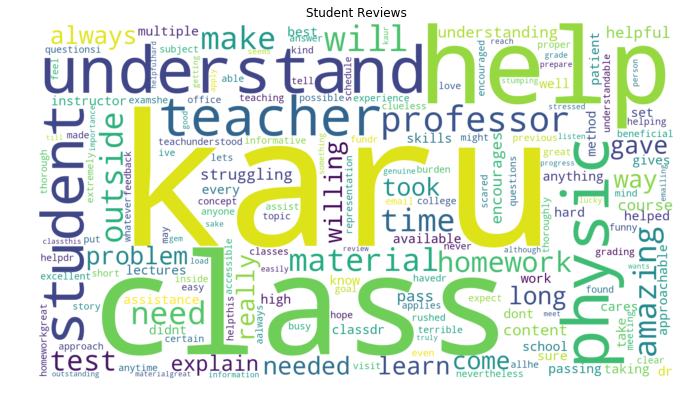

In [30]:
f = plt.figure(figsize = (25,25))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Student Reviews')
plt.axis("off")
plt.show()